# importing Libraries

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [9]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Train a Decision Tree Classifier & Visualize

In [14]:
from sklearn import tree

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

# Visualize the tree (text version)


DecisionTreeClassifier(random_state=42)

# Visualize the tree (text version)


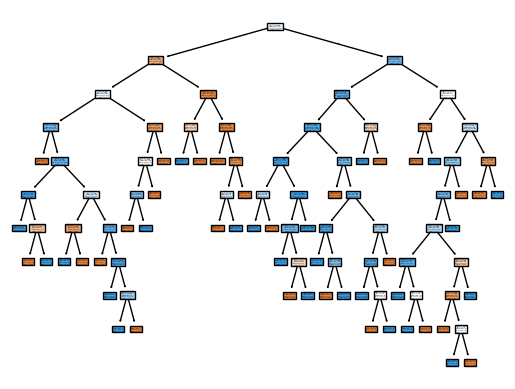

In [19]:
tree.plot_tree(clf_tree, filled=True, feature_names=X.columns, class_names=True)
plt.show()

# Analyze Overfitting & Control Tree Depth

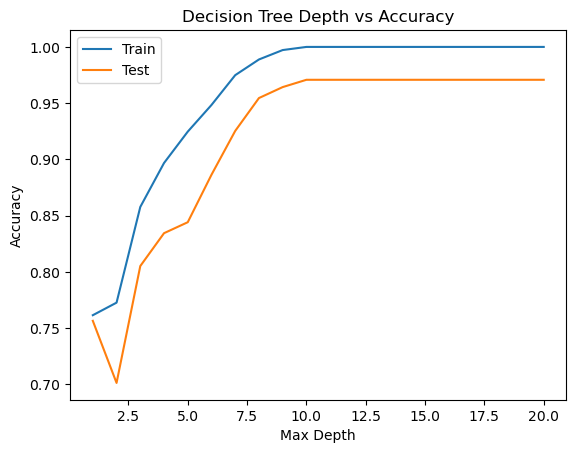

In [29]:
depths = list(range(1, 21))
train_scores = []
test_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depths, train_scores, label="Train")
plt.plot(depths, test_scores, label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Decision Tree Depth vs Accuracy")
plt.show()



#  Train a Random Forest & Compare Accuracy

In [32]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)
y_pred_tree = clf_tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Decision Tree Accuracy: 0.9707792207792207
Random Forest Accuracy: 0.9805194805194806


# Interpret Feature Importances

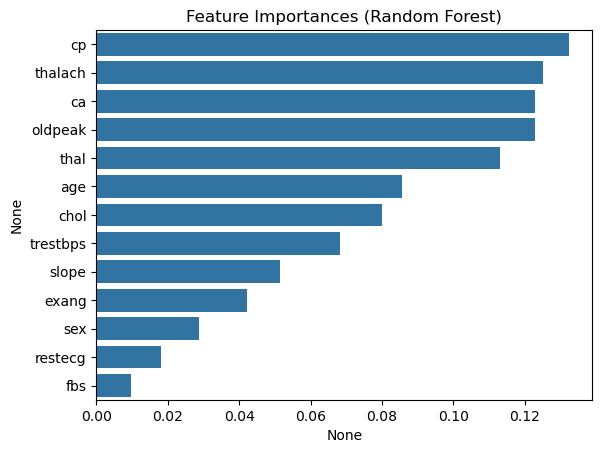

In [35]:
importances = clf_rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances (Random Forest)")
plt.show()


# Evaluate Using Cross-Validation

In [38]:
rf_cv_scores = cross_val_score(clf_rf, X, y, cv=5)
print("Random Forest CV Accuracy: %.3f ± %.3f" % (rf_cv_scores.mean(), rf_cv_scores.std()))


Random Forest CV Accuracy: 0.997 ± 0.006
